# NLP CLASSIFICATION AND SENTIMENT ANALYSIS

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import pandas as pd
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize,sent_tokenize,WordPunctTokenizer,TreebankWordTokenizer

In [4]:
nltk.download('stopwords')
nltk.corpus.stopwords.words('english')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 960F-0421

 Directory of C:\Users\ibrahim\Documents\Yapay-Zeka\HW-NLP CLASSIFICATION

13.08.2025  20:02    <DIR>          .
13.08.2025  19:29    <DIR>          ..
13.08.2025  19:52    <DIR>          .ipynb_checkpoints
13.08.2025  19:27            70.600 cloud.png
13.08.2025  20:02            67.888 NLP CLASSIFICATION AND SENTIMENT ANALYSIS.ipynb
13.08.2025  19:28        35.271.913 NLP_Sentiment-Analysis.pdf
13.08.2025  19:27         8.955.572 restaurant.csv
13.08.2025  19:26           130.851 wc.png
               5 File(s)     44.496.824 bytes
               3 Dir(s)  83.843.371.008 bytes free


In [7]:
df=pd.read_csv('restaurant.csv')

In [8]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


In [9]:
# Burda textler yorumlar 

In [10]:
df.shape

(10417, 10)

In [11]:
df['text']=df['text'].str.lower()   # Herşeyi küçük harfe çevirdik

In [12]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""a feast worthy of gods""\n\nbaccarnal buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it! too salty food and expensive! th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could. m...,2015-07-28 07:13:17


In [13]:
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)  # Noktalama işaretlerini kaldır
df['text']=df['text'].str.replace('\d+','',regex=True)       # Rakamları kaldır
df['text']=df['text'].str.replace('\n','',regex=True)        # Satır sonlarını kaldır
df['text']=df['text'].str.replace('\r','',regex=True)        # Entera basılan yerleri kaldır

In [14]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17


In [15]:
df['text'][0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [16]:
# Sentiment analysis

In [17]:
ybw=df[(df.stars==1)|(df.stars==5)]    # Starı 1 ve 5 olanları seçtik

In [18]:
ybw

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
5,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
8,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19
...,...,...,...,...,...,...,...,...,...,...
10409,3219831,--Rcc25wmvC2YikMKO1duQ,EKLCM0XAOTq14wNnuMAGWA,RESDUcs7fIiihp38-d6_6g,5,1,0,0,we went to bacchanal on easter sunday as it wa...,2019-04-28 18:59:53
10410,3219849,LbMPx0u9mAcaVDOYiiArsQ,0wNZkuUFDnMA_8YP_PE3Zw,RESDUcs7fIiihp38-d6_6g,1,0,0,0,came him from la thanksgiving week we decided ...,2019-12-05 18:01:49
10411,3219894,ErLDRaBYPyt8x6DkJuY9TA,YhLSS4TmTFuQOrN4RAUlBw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,every time we visit las vegas we go to this bu...,2019-12-05 21:34:56
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36


In [19]:
ybw.reset_index(drop=True,inplace=True)  # Satırları düzelttik

In [20]:
ybw

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
2,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
3,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
4,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19
...,...,...,...,...,...,...,...,...,...,...
5298,3219831,--Rcc25wmvC2YikMKO1duQ,EKLCM0XAOTq14wNnuMAGWA,RESDUcs7fIiihp38-d6_6g,5,1,0,0,we went to bacchanal on easter sunday as it wa...,2019-04-28 18:59:53
5299,3219849,LbMPx0u9mAcaVDOYiiArsQ,0wNZkuUFDnMA_8YP_PE3Zw,RESDUcs7fIiihp38-d6_6g,1,0,0,0,came him from la thanksgiving week we decided ...,2019-12-05 18:01:49
5300,3219894,ErLDRaBYPyt8x6DkJuY9TA,YhLSS4TmTFuQOrN4RAUlBw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,every time we visit las vegas we go to this bu...,2019-12-05 21:34:56
5301,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36


In [21]:
x=ybw[['text']]
y=ybw['stars']

In [22]:
#pip install textblob


In [23]:
from textblob import TextBlob

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
def ekkok(text):
    words=TextBlob(text).words
    return [word.lemmatize() for word in words]

In [28]:
import nltk
nltk.download('punkt')        # Temel tokenizasyon modeli
nltk.download('punkt_tab')    # NLTK >= 3.9 ile gelen ek model
nltk.download('wordnet')      # Lemmatization için
nltk.download('omw-1.4')      # WordNet çok dillilik desteği
nltk.download('stopwords')    # Stopwords listesi


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
vect=CountVectorizer(analyzer=ekkok,stop_words='english',ngram_range=(1,2))

In [30]:
xyeni=vect.fit_transform(x['text'])

C:\Users\ibrahim\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
C:\Users\ibrahim\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [31]:
print(vect.get_feature_names_out()[-50:])

['zinger' 'zip' 'zipped' 'ziti' 'zone' 'zonecold' 'zong' 'zoo' 'zorro'
 'zu' 'zubereitet' 'zucchini' 'zugänglich' 'zur' 'à' 'àlacarte' 'ça' 'ét'
 'étaient' 'éventail' 'évite' 'östlich' 'únicamente' 'über' 'üblich'
 'übliche' 'お料理一品一品の見た目もとても綺麗です' 'ステーキ' 'デザート達には' 'メチャ美味しいし'
 'ラスベガスに行ったらバッフェに少しお値段高めですがこちらは種類の多さ美味しさどれも良かったですわたし達が行った日は待ち時間も五分程で案内されスタッフの方々の対応も丁寧でしたどの料理も目を引くような盛り付け方や彩りがよくみているだけでもワクワクします私は野菜料理ばかり食べましたがシーフードも美味しかったと家族が言っていましたまた食べに行きたいと思えるバッフェでした'
 '中午没有雪蟹腿菜都很一般港式点心说的过去其他的中式菜只能说尚且入口寿司品质还行' '中国游客别去chinese'
 '凯撒宫的自助餐怎么可以这么棒帝王蟹生蚝虾蟹鲜美无比羊排叉烧披萨提拉米苏布丁每一样都想说umm好吃好吃' '吃出了泪花' '品揃えも豊富で'
 '大大満足' '并没有一些中式buffet好其实两小时的限制也让人不愉快前台不友好'
 '慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢啊啊ーー' '服务很好价格也实惠' '没礼貌的服务'
 '特に茹でたカニと' '皿'
 '看了网上的广告去的非常失望菜色没有那么丰富大部分菜品颜色暗沉给人感觉不新鲜最想吃的蟹腿肉质又散又软真的没办法接受服务是没什么服务的了点完就没人理你了饮料见底也没服务人员主动添加叫个服务员还慢慢吞吞给你脸色真的太糟糕了very'
 '真心不怎么样' '肯定是请来了全球最地道的大厨吧然而才多一位甩国内的自助条街' '这里真心没有爱和很糟糕'
 '连粥和油条都做的地地道道萝卜干都是萧山的味道啊'
 '食物还可以但吃饭要排很久的队而且歧视中国人吃饭还要出示护照不是很好找在凯撒一楼赌场的里面牛排还可以但是螃蟹腿海鲜等食物一般没有想象中的好没有醋等调料吃起来可

In [32]:
x_train,x_test,y_train,y_test=train_test_split(xyeni,y,random_state=42,test_size=0.2)

In [33]:
dt=DecisionTreeClassifier()

In [34]:
model=dt.fit(x_train,y_train)

In [35]:
tahmin=model.predict(x_test)

In [36]:
accuracy_score(tahmin,y_test)   # Acc %86 bulduk

0.8642789820923656

In [37]:
# Derin Öğrenmeyle Tahmin Etme

In [38]:
import tensorflow as tf

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
x_train=x_train.toarray()
x_test=x_test.toarray()

In [41]:
model=Sequential()   
model.add(Dense(80,activation='relu'))     #İlk 120 neronu bağlamış olduk,, relu veri önemliyse 1 in üstnde geliyor önemsizse es geçiyor
model.add(Dense(120,activation='relu'))     # 2. layerı oluşturuyoruz
model.add(Dense(64,activation='relu'))     # 3. layerı oluşturduk
model.add(Dense(30,activation='relu'))      # 4. layerı oluşturduk
model.add(Dense(4,activation='relu'))       # 5. layerı oluşturduk
model.add(Dense(1,activation='softmax'))    # Son layerı oluşturduk Classifaction da sonuç evet veya hayır olacağı için sigmoid kullandık
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
history=model.fit(x_train,y_train, epochs=15,batch_size=120,validation_split=0.1,verbose=1)   # Verbose 0 dersek aşağıdaki sonucu göstermez

Epoch 1/15


C:\Users\ibrahim\anaconda3\Lib\site-packages\keras\src\ops\nn.py:938: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\ibrahim\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.2049 - loss: 0.0000e+00 - val_accuracy: 0.1694 - val_loss: 0.0000e+00
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2049 - loss: 0.0000e+00 - val_accuracy: 0.1694 - val_loss: 0.0000e+00
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2049 - loss: 0.0000e+00 - val_accuracy: 0.1694 - val_loss: 0.0000e+00
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2049 - loss: 0.0000e+00 - val_accuracy: 0.1694 - val_loss: 0.0000e+00
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2049 - loss: 0.0000e+00 - val_accuracy: 0.1694 - val_loss: 0.0000e+00
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2049 - loss: 0.0000e+00 - val_accuracy: 0.1694 - val_loss: 0.0000e+00
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2049 - loss: 0.0000e+00 - val_accuracy: 0.1694 - val_loss: 0.0000e+00
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [45]:
def wc(data,color):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=color, stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')           

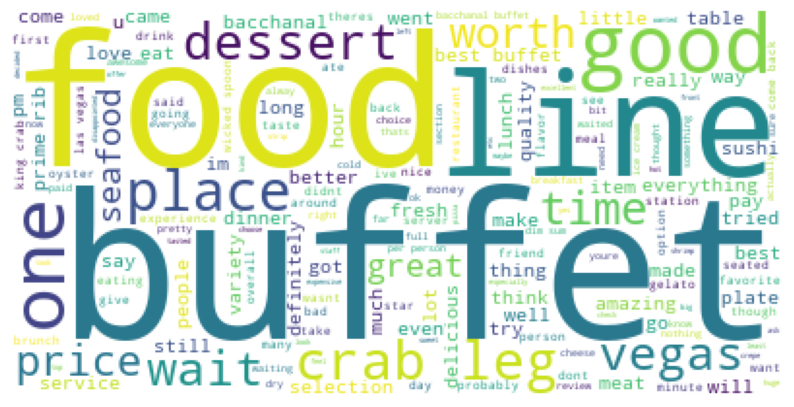

In [47]:
wc(df['text'],'white')

In [48]:
pip install stylecloud


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259505 sha256=9b1f31d05f67ec71bf65d3eb98ca316444ae73090903a6a2cd34d01c1edfbd64
  Stored in directory: c:\users\ibrahim\appdata\local\pip\cache\wheels\07\5f\c8\44a6d29ea14b7e7922393a7e43c08ff1b5c3539574cdae3737
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114263 sha256=c7b877902a193aefd63a1ac497fb6e5f3026f93a19e148530b593f367af28916
  Stored in directory: c:\users\ibrahim\appdata\local\pip\cache\wheels\92\61\3f\600cf4d91dac9f979f4648ca6db99ed6d9fc762abc6f06b2b5
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43956 sha256=5acba404e9b818be1b7a904ce267411ceada9c7a

  DEPRECATION: Building 'stylecloud' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'stylecloud'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'fire' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'fire'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'tinycss' using the legacy setup.py bdist_wheel mechanism, w

In [49]:
pip install pillow==9.5.0

     ---------------------------------------- 0.0/50.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/50.5 MB ? eta -:--:--
     --------------------------------------- 0.5/50.5 MB 953.0 kB/s eta 0:00:53
     --------------------------------------- 0.5/50.5 MB 953.0 kB/s eta 0:00:53
      -------------------------------------- 0.8/50.5 MB 941.1 kB/s eta 0:00:53
      -------------------------------------- 1.0/50.5 MB 976.1 kB/s eta 0:00:51
     - -------------------------------------- 1.3/50.5 MB 1.1 MB/s eta 0:00:46
     - -------------------------------------- 1.6/50.5 MB 1.1 MB/s eta 0:00:45
     - -------------------------------------- 1.8/50.5 MB 1.1 MB/s eta 0:00:44
     - -------------------------------------- 2.1/50.5 MB 1.2 MB/s eta 0:00:42
    

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
      exec(compile('''
      ~~~~^^^^^^^^^^^^
      # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ...<32 lines>...
      exec(compile(setup_py_code, filename, "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ''' % ('C:\\Users\\ibrahim\\AppData\\Local\\Temp\\pip-install-v75gy2gw\\pillow_e379f00b0e204d2aa085be12e709a772\\setup.py',), "<pip-setuptools-caller>", "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "<pip-setuptools-caller>", line 35, in <module>
    File "C:\Users\ibrahim\AppData\Local\Temp\pip-insta

In [50]:
import stylecloud as sc

In [51]:
def wc2(data):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')           

In [52]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 960F-0421

 Directory of C:\Users\ibrahim\Documents\Yapay-Zeka\HW-NLP CLASSIFICATION

13.08.2025  20:16    <DIR>          .
13.08.2025  19:29    <DIR>          ..
13.08.2025  19:52    <DIR>          .ipynb_checkpoints
13.08.2025  19:27            70.600 cloud.png
13.08.2025  20:16           468.476 NLP CLASSIFICATION AND SENTIMENT ANALYSIS.ipynb
13.08.2025  19:28        35.271.913 NLP_Sentiment-Analysis.pdf
13.08.2025  19:27         8.955.572 restaurant.csv
13.08.2025  19:26           130.851 wc.png
               5 File(s)     44.897.412 bytes
               3 Dir(s)  83.755.745.280 bytes free


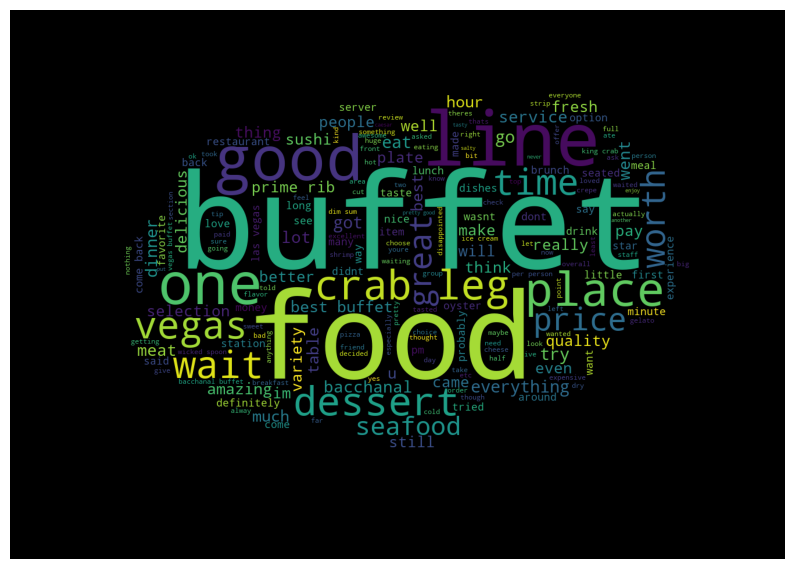

In [53]:
wc2(df['text'])